<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Keras_DeepLearning_Recon_Numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.utils import np_utils
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [ ]:
# Problema consiste em desenvolver um modelo neural baseado em Deep Learning
# para possibilitar a decodificação de caracteres manuscritos presentes na
# base de dados mnist. Esta base de dados possui 60 mil exemplos de treinamento
# 10 mil exemplos de teste com atributos dispostos em formato de uma matriz
# 28x28, onde o valor de cada elemento corresponde a um pixel ativo ou nao. Os
# pixels ativos compõe o digito.

In [10]:
#Obtenção dos dados e divisao automatica entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '9')

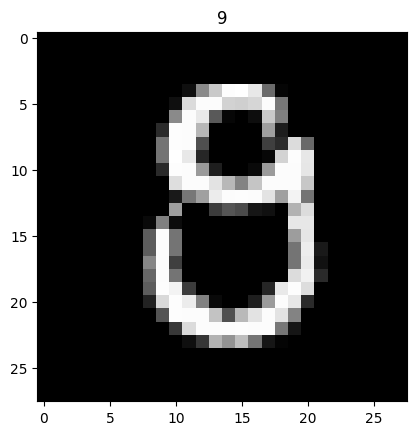

In [11]:
# visualisao de imagens especificas
plt.imshow(X_treinamento[80], cmap = 'gray')

In [ ]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
# Os primeiros 784 atributos correspodem à transformação de uma matriz
# de 28x28 pixels corresponde ao digito em um vetor unidimensional. O atributo
# 785 corresponde ao rótulo do digito (alvo)

In [12]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
x = X_treinamento[80]

In [13]:
# transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [14]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [15]:
# transfomação para o formato dumpy (temos 10 classes)
# Y_treinamento = np_utils.to_categorical(y_treinamento, 10)
# y_teste = np_utils.to_categorical(y_teste, 10)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_treinamento[80]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neuronios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.1))

modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.1))

modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.1))
#camda de saida, softmax probabilidade

modelo.add(Dense(units = 10, activation = 'softmax'))


In [17]:
# visualizacao da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [19]:
# Configuracao dos parametros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os historicos das execucoes (erro e acuracy)
# optimizer = Adam, RMSprop, SGD, etc..
modelo.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))



Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3597 - accuracy: 0.8893 - val_loss: 0.1537 - val_accuracy: 0.9545
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1755 - accuracy: 0.9471 - val_loss: 0.1190 - val_accuracy: 0.9638
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1399 - accuracy: 0.9585 - val_loss: 0.1026 - val_accuracy: 0.9692
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1194 - accuracy: 0.9639 - val_loss: 0.0946 - val_accuracy: 0.9700
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.9680 - val_loss: 0.1014 - val_accuracy: 0.9708
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0960 - accuracy: 0.9707 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9725 - val_loss: 0.0855 - val_accuracy:

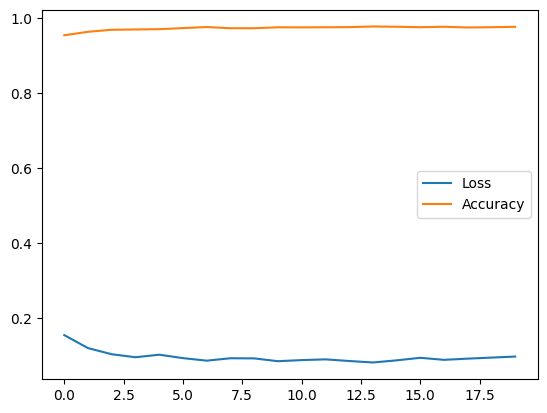

In [20]:
plt.figure(2)
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'], label = 'Loss')
# performance da rede
plt.plot(historico.history['val_accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

# Perdas e Acuracia de validação

In [21]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
print(previsoes)

313/313 [==============================] - 1s 2ms/step
[[5.8187000e-13 5.0875160e-10 8.8555021e-09 ... 9.9999803e-01
  3.8405348e-11 1.8581120e-06]
 [1.9292300e-12 9.3257029e-08 9.9999982e-01 ... 2.9029287e-10
  2.7610410e-11 1.1321046e-19]
 [2.0135719e-10 9.9998325e-01 1.4336636e-05 ... 1.4278856e-06
  4.8864382e-07 3.5329922e-10]
 ...
 [4.1083783e-15 1.5304041e-10 5.0803246e-12 ... 2.9096314e-09
  8.2000049e-12 2.1684848e-07]
 [3.5159532e-19 1.0341725e-19 6.4538582e-21 ... 5.5339217e-20
  1.3614792e-13 4.9934523e-15]
 [2.6323423e-12 3.9868375e-17 1.2167386e-16 ... 4.3152945e-23
  1.1304868e-11 4.2458794e-16]]


In [26]:
# valor maximo (com a probabilidafde maior por serem 10n saidas) e geração da matrix de confusao
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
print(confusao)

[[ 972    1    1    1    0    1    1    1    2    0]
 [   0 1125    3    2    0    1    1    1    2    0]
 [   6    2 1013    1    1    0    2    2    5    0]
 [   0    0    5  977    0   17    0    6    5    0]
 [   0    0    4    0  967    0    2    1    0    8]
 [   4    1    0    3    0  875    2    2    4    1]
 [   6    3    1    0    7    6  933    0    2    0]
 [   2    1    9    4    1    0    0 1006    0    5]
 [   7    1    5    4    2   11    1    4  935    4]
 [   1    2    0    4   17    7    1    8    1  968]]


In [27]:
# Previsao com um novo registro, convertendo o array para o formato de matriz numero 9
print(y_treinamento[80])

#passo a mesma posicao para o modelo prever
novo= X_treinamento[80]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
print(np.argmax(pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 20ms/step
8


In [28]:
pred

array([[2.6669246e-01, 3.6572074e-04, 4.9470784e-03, 7.0853522e-03,
        9.8150112e-03, 1.6252635e-03, 2.7702707e-03, 2.6900892e-04,
        5.1760757e-01, 1.8882222e-01]], dtype=float32)